# DRX Analsys
## From Luis Jesus Avila 
### Introduction

This work is part of my thesis project. This task consists of visualizing the peaks within my graph to later compare them with a database. The coincidences of the peaks with the database determine the synthesized materials. The compounds used were ammonium metavanadate, nitiric acid and water.

In [12]:
import powerxrd as xrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#we import our documents
data = xrd.Data('Theta_30.csv').importfile() #DRX Data
chart = xrd.Chart(*data)
chart_2 = xrd.Chart(*data)


### First viewing
We make a first visualization where you can review what tools we will use.

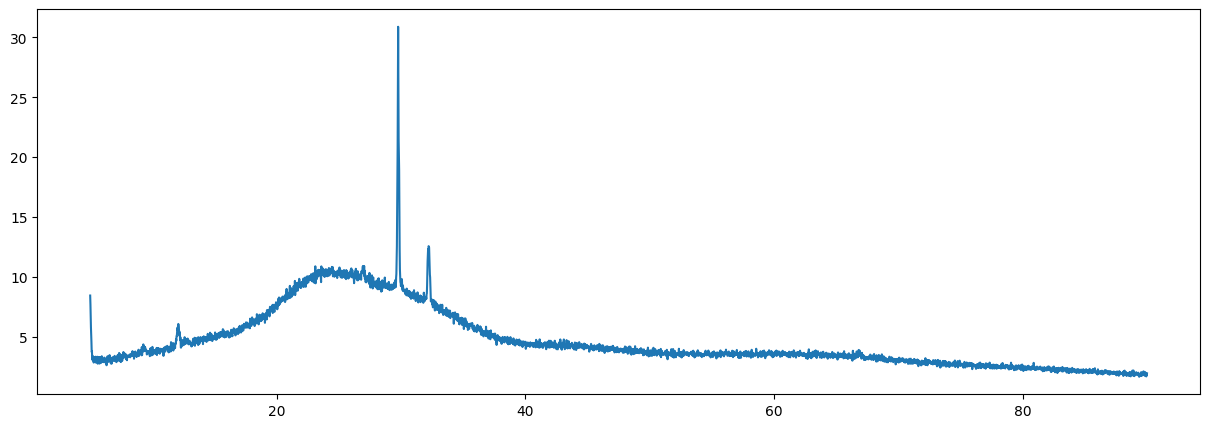

In [14]:
# Primero revisamos los datos por si solos
plt.figure(figsize = (15,5))
plt.plot(*data, label = 'Original')

plt.show()

As we can see we have a lot of noise. We also need to add a baseline and reduce the noise

### First filters

The first 2 filters will be applied. The first filter consists of approximating a polynomial as a basis for the data to align with a horizontal line. The second filter consists of reducing the noise, which will allow us to manually choose the peaks.

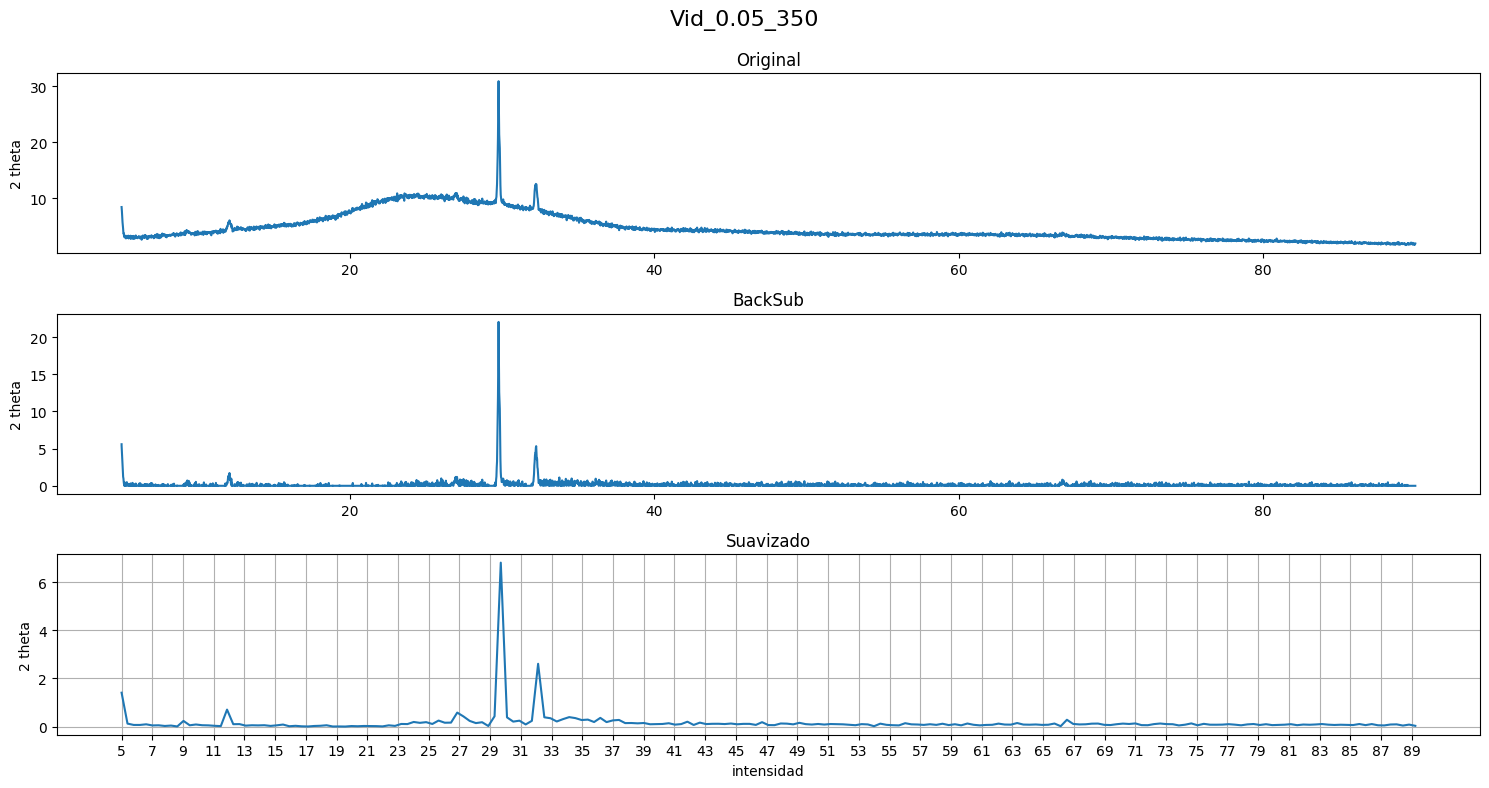

In [15]:
# We will put everything in a graphic 

fig, axs = plt.subplots( 3, 1, figsize = (15,8))

axs[0].plot(*data) #original graphic
axs[0].set_title('Original')
#axs[0].set_xlabel('intensidad')
axs[0].set_ylabel('2 theta')

axs[1].plot(*chart.backsub()) # graphic with first filter
axs[1].set_title('BackSub')
#axs[1].set_xlabel('intensidad')
axs[1].set_ylabel('2 theta')

axs[2].plot(*chart.mav(20)) # graphic with second filter
axs[2].set_title('Suavizado')
axs[2].set_xlabel('intensidad')
axs[2].set_ylabel('2 theta')
axs[2].set_xticks(np.arange(5,90,2))
axs[2].grid(True)

plt.suptitle('Vid_0.05_350', fontsize = 16)

plt.tight_layout()

fig.subplots_adjust(top=0.90)

plt.show()

### Range selection

We select the ranges in which we see peaks. These will be selected with part of a package dedicated to XRD analysis


-Gaussian fit results-
y-shift 0.03791327162167754
amplitude 0.08439972762989122
mean 9.319829663835316
sigma 0.08311476550901907
covariance matrix 
[[ 2.09155430e-04 -9.24291370e-05 -6.22583369e-09 -6.06789282e-05]
 [-9.24291370e-05  1.83458470e-04  3.32172351e-08  1.20454976e-04]
 [-6.22583369e-09  3.32172351e-08  1.84385339e-04  3.82197708e-08]
 [-6.06789282e-05  1.20454976e-04  3.82197708e-08  2.01997793e-04]]

SchPeak: Scherrer width calc. for peak in range of [8,10]

FWHM == sigma*2*sqrt(2*ln(2)): 0.19572031585868507 degrees
K (shape factor): 0.9
K-alpha: 0.15406 nm 
max 2-theta: 9.3156 degrees

SCHERRER WIDTH: 40.72450113810263 nm

-Gaussian fit results-
y-shift 0.05862267839379702
amplitude -0.2640091805805789
mean 12.071924115698591
sigma -0.08538431133447988
covariance matrix 
[[3.31144927e-04 1.50352568e-04 3.80079931e-09 3.24173860e-05]
 [1.50352568e-04 2.98426293e-04 2.00822148e-08 6.43490861e-05]
 [3.80079931e-09 2.00822148e-08 3.20997044e-05 6.34882400e-09]
 [3.24173860

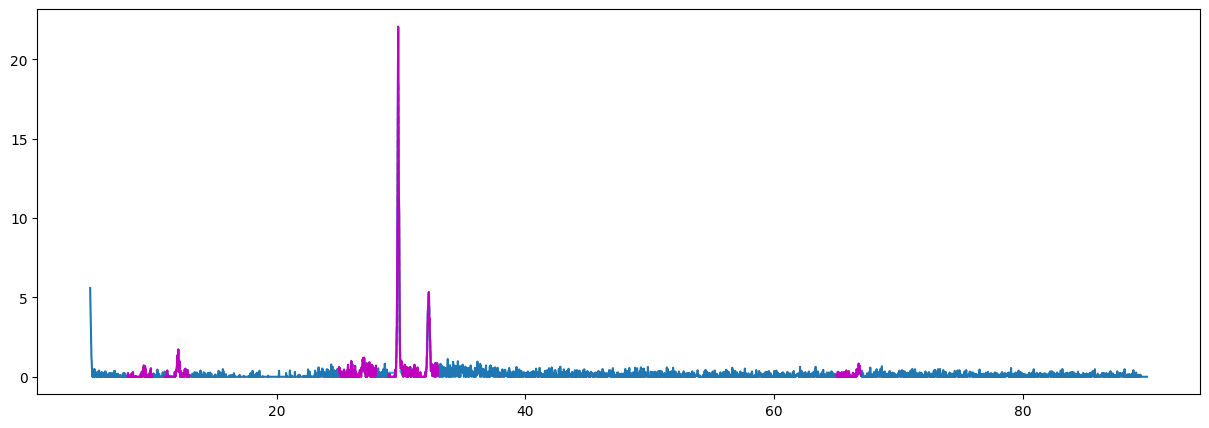

In [16]:
# We crate a bucle to find the peaks into our ranges 
puntas_30 = list()
puntas_30_2 = list()

plt.figure(figsize=(15,5))

plt.plot(*chart_2.backsub())

rangos = [[8,10],[11,13],[25,28],[29,31],[31,33],[65,67]]

for i in rangos:
    lista_aux = chart_2.SchPeak(xrange=[i[0],i[1]],verbose=True, show=True)
    
    puntas_30.append(lista_aux[0]) # peaks on axis x
    puntas_30_2.append(lista_aux[1]) # peaks on axis y 

plt.show() # we show mark peaks

### charts 
We take a first look at our data from the crystallographic charts

In [17]:
#Ahora indexamos las cartas 
df_cartas = pd.read_csv('Cartas.csv')

df_cartas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   teta V2O5           74 non-null     float64
 1   intensidad V2O5     74 non-null     float64
 2   teta V3O8           111 non-null    float64
 3   intensidad V3O8     111 non-null    float64
 4   teta VO2            71 non-null     float64
 5   intensidad VO2      71 non-null     float64
 6   teta V2O3           61 non-null     float64
 7   intensidad V2O3     61 non-null     float64
 8   teta V2O5-H         74 non-null     float64
 9   intensidad  V2O5-H  74 non-null     float64
 10  teta Si             31 non-null     float64
 11  intensidad Si       31 non-null     float64
dtypes: float64(12)
memory usage: 10.5 KB


The thin films of our material were grown on glass, therefore we do not need silicon.

Additionally, we only need data that matches our chosen ranges. So we create a loop to select them.

In [18]:
df_1 = pd.DataFrame()

for i in range(0, len(df_cartas.columns)-2,2):
    df_3 = pd.DataFrame()
    
    for rango in rangos:
        df_2 = pd.DataFrame()
        df_2 = df_cartas.iloc[:,i:i+2].copy()
        filtro = (df_2[df_2.columns[0]] >= rango[0]) & (df_2[df_2.columns[0]] <= rango[1])
        df_2 = df_2[filtro]
        df_3 = pd.concat([df_3,df_2], ignore_index=True)
    
    df_1 = pd.concat([df_1,df_3], axis=1)
    
df_1
        
        

,teta V2O5,intensidad V2O5,teta V3O8,intensidad V3O8,teta VO2,intensidad VO2,teta V2O3,intensidad V2O3,teta V2O5-H,intensidad V2O5-H
0,25.497,0.044,9.271,0.002,26.294,0.396,65.506,0.405,25.377,0.138
1,26.099,0.788,29.750,0.012,65.474,0.193,66.851,0.002,29.645,0.346
2,30.898,0.311,29.914,0.104,66.845,0.004,NaN,NaN,30.787,0.120
3,30.961,0.363,30.232,0.999,NaN,NaN,NaN,NaN,32.772,0.065
4,32.310,0.300,65.368,0.001,NaN,NaN,NaN,NaN,65.349,0.047
5,65.870,0.055,65.478,0.047,NaN,NaN,NaN,NaN,65.834,0.040
6,65.895,0.001,65.496,0.002,NaN,NaN,NaN,NaN,66.659,0.034
7,NaN,NaN,65.832,0.045,NaN,NaN,NaN,NaN,66.683,0.042
8,NaN,NaN,66.308,0.017,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,66.478,0.014,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, there is a greater number of **V3O8**, **V2O5** and **V2O5-H**.

### Grphic charts

Now we graph the cards together with our data to realize which compounds are in each peak.

<function matplotlib.pyplot.show(close=None, block=None)>

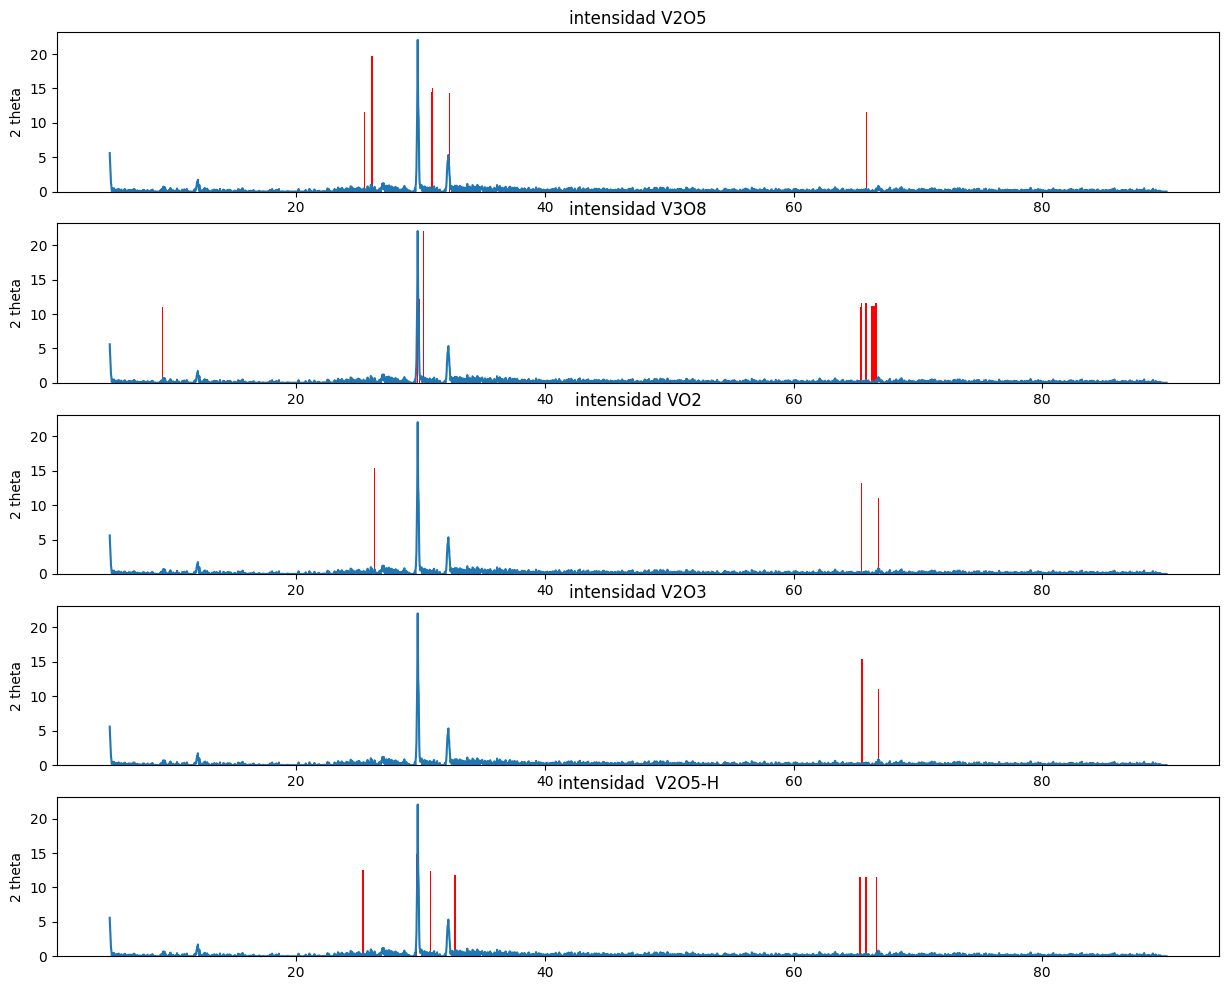

In [19]:

fig, axs = plt.subplots( int(len(df_1.columns) / 2), 1, figsize = (15,12))
max_i = np.max(chart_2.y)

aux = 0
for i in range(0,len(df_1.columns),2):
    
    teta = df_1.iloc[:,i].values
    intensidad = df_1.iloc[:, i+1].values
    
    
    intensidad = (max_i/2) + (max_i/2) * intensidad # Made peaks visible
    
    axs[aux].plot(chart_2.x, chart_2.y, label = 'drx')
    axs[aux].bar(teta, intensidad, label = df_1.columns[i+1], width = 0.1, color = 'r')
    axs[aux].set_title(df_1.columns[i+1])
    #axs[0].set_xlabel('intensidad')
    axs[aux].set_ylabel('2 theta')
    
    aux = aux + 1
    
plt.show

### Index letters


-Gaussian fit results-
y-shift 0.03791327162167754
amplitude 0.08439972762989122
mean 9.319829663835316
sigma 0.08311476550901907
covariance matrix 
[[ 2.09155430e-04 -9.24291370e-05 -6.22583369e-09 -6.06789282e-05]
 [-9.24291370e-05  1.83458470e-04  3.32172351e-08  1.20454976e-04]
 [-6.22583369e-09  3.32172351e-08  1.84385339e-04  3.82197708e-08]
 [-6.06789282e-05  1.20454976e-04  3.82197708e-08  2.01997793e-04]]

SchPeak: Scherrer width calc. for peak in range of [8,10]

FWHM == sigma*2*sqrt(2*ln(2)): 0.19572031585868507 degrees
K (shape factor): 0.9
K-alpha: 0.15406 nm 
max 2-theta: 9.3156 degrees

SCHERRER WIDTH: 40.72450113810263 nm

-Gaussian fit results-
y-shift 0.05862267839379702
amplitude -0.2640091805805789
mean 12.071924115698591
sigma -0.08538431133447988
covariance matrix 
[[3.31144927e-04 1.50352568e-04 3.80079931e-09 3.24173860e-05]
 [1.50352568e-04 2.98426293e-04 2.00822148e-08 6.43490861e-05]
 [3.80079931e-09 2.00822148e-08 3.20997044e-05 6.34882400e-09]
 [3.24173860

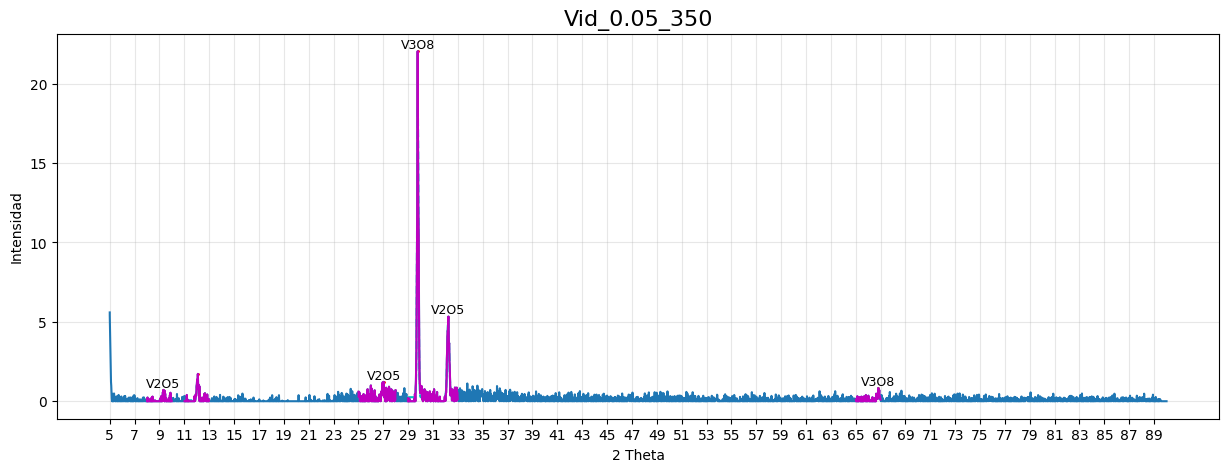

In [20]:

chart_3 = xrd.Chart(*data)

plt.figure(figsize=(15,5))

plt.plot(*chart_3.backsub())

rangos = [[8,10],[11,13],[25,28],[29,31],[31,33],[65,67]]

for i in rangos:
    lista_aux = chart_3.SchPeak(xrange=[i[0],i[1]],verbose=True, show=True)
    
n1 = 'V3O8'
n2 = 'V2O5'

nombres = [n2, ' ', n2, n1, n2, n1] # We choosee manual the peaks
plt.scatter( puntas_30, puntas_30_2, color = 'r', s = 1)

for i, texto in enumerate(nombres):
    plt.text(puntas_30[i], puntas_30_2[i], texto, fontsize = 9, ha = 'center', va = 'bottom')


plt.title('Vid_0.05_350', fontsize = 16)
plt.xlabel('2 Theta')
plt.ylabel('Intensidad')
plt.xticks(np.arange(5,90,2))
plt.grid(alpha = 0.3)

plt.show()

### Conclusion

In conclusion we can say that there is a greater presence of vanadium oxide in its V3O8 and V2O5 form.